In [38]:
# Installing required python libraries

# !pip install pandas==2.2.3
# !pip install numpy==2.1.3
# !pip install matplotlib==3.9.2
# !pip install seaborn==0.13.2
# !pip install scikit-learn==1.5.2
# !pip install xgboost==2.1.2

In [39]:
# Importing python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
data = pd.read_csv("Datasets/doped_oxide_standardised_data.csv")
data.head()

,band_gap,sample,crystal_size,base,dopant,crystal_system,ssa,a,c,dopant_conc
0,3.122,pure TiO2,190.0,Ti,X,anatase,-0.685318,0.942674,-0.430367,-0.592368
1,3.087,1.0% Cu−3.5% In−TiO2,80.0,Ti,In,anatase,-0.712864,0.978868,1.598636,-0.174409
2,2.430,5 mol % Cu-doped TiO2 (700°C),NaN,Ti,Cu,anatase,0.682544,0.959126,-0.460148,0.004716
3,2.510,5 mol % Cu-doped TiO2 (600°C),NaN,Ti,Cu,anatase,0.808469,1.044675,1.580099,0.004716
4,2.280,"5 mol % Cu, 15 mol % Zr co-doped TiO2 (700 °C)",NaN,Ti,Zr,anatase,0.446435,1.169709,2.782602,1.198884


In [41]:
data['crystal_system'].value_counts()

crystal_system
wurtzite    75
anatase     62
Name: count, dtype: int64

In [42]:
data['base'].value_counts()

base
Zn    75
Ti    62
Name: count, dtype: int64

In [62]:
df = data.drop(['sample', 'crystal_system', 'dopant'], axis=1)

<Axes: xlabel='base', ylabel='count'>

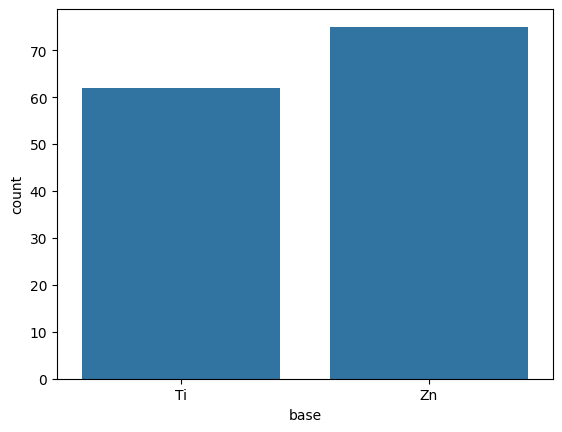

In [63]:
sns.countplot(x=df.base)

<Axes: xlabel='base', ylabel='band_gap'>

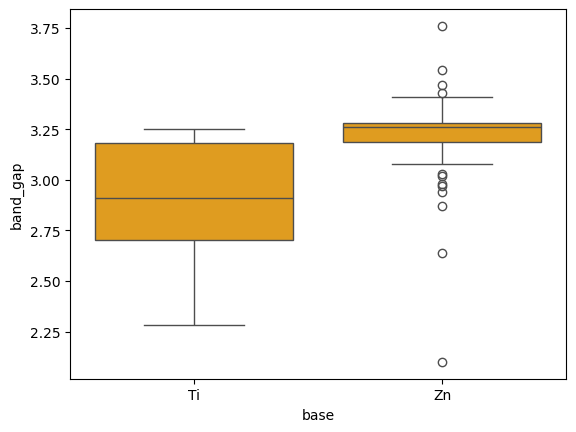

In [64]:
# Trend of band gap for Zn and Ti oxides
# Band gap of Zinc oxides doesn't vary much with dopant addition
# while for Titanium oxides it changes substantially 
sns.boxplot(x=df['base'],y=df['band_gap'], color='orange')

<Axes: xlabel='base', ylabel='band_gap'>

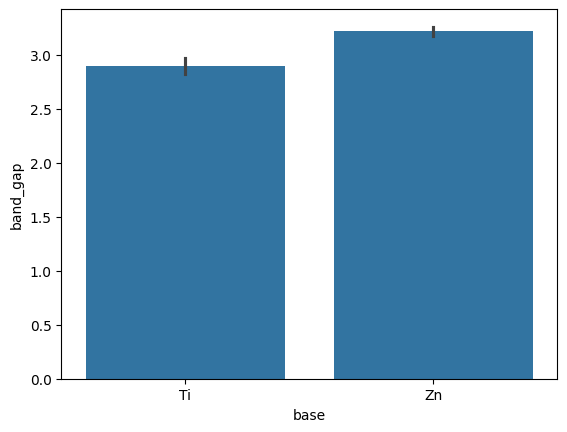

In [65]:
# Trend of band gap with base system
# zinc oxides have slightly higher band gaps than titania
sns.barplot(x=df['base'],y=df['band_gap'])

In [66]:
# Custom Label to encode base oxide
custom_labelling = {"Zn" : 0,
                    "Ti" : 1}
encoded_labels = []
for label in df.base:
  encoded_labels.append(custom_labelling[label])

df['base'] = encoded_labels

In [67]:
df.head()

,band_gap,crystal_size,base,ssa,a,c,dopant_conc
0,3.122,190.0,1,-0.685318,0.942674,-0.430367,-0.592368
1,3.087,80.0,1,-0.712864,0.978868,1.598636,-0.174409
2,2.430,NaN,1,0.682544,0.959126,-0.460148,0.004716
3,2.510,NaN,1,0.808469,1.044675,1.580099,0.004716
4,2.280,NaN,1,0.446435,1.169709,2.782602,1.198884


In [69]:
# Correlation Matrix
matrix = df.corr()
matrix

,band_gap,crystal_size,base,ssa,a,c,dopant_conc
band_gap,1.000000,0.645956,-0.559431,-0.188862,-0.540157,-0.529866,-0.526645
crystal_size,0.645956,1.000000,-0.852122,-0.338014,-0.770336,-0.718061,-0.384916
base,-0.559431,-0.852122,1.000000,NaN,0.921876,0.600460,0.255571
ssa,-0.188862,-0.338014,NaN,1.000000,0.177768,0.180620,0.164776
a,-0.540157,-0.770336,0.921876,0.177768,1.000000,0.552944,0.222506
c,-0.529866,-0.718061,0.600460,0.180620,0.552944,1.000000,0.471790
dopant_conc,-0.526645,-0.384916,0.255571,0.164776,0.222506,0.471790,1.000000


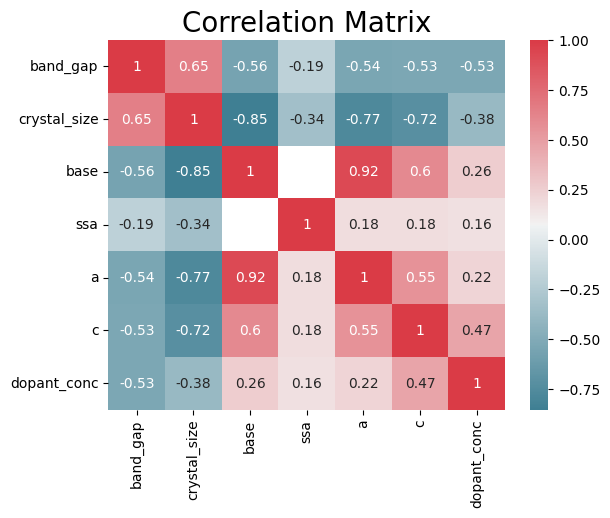

In [70]:
# Correlation Chart
corr = df.corr()
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("Correlation Matrix", fontsize=20)
plt.show()

In [72]:
abs(matrix['band_gap'])

band_gap        1.000000
crystal_size    0.645956
base            0.559431
ssa             0.188862
a               0.540157
c               0.529866
dopant_conc     0.526645
Name: band_gap, dtype: float64

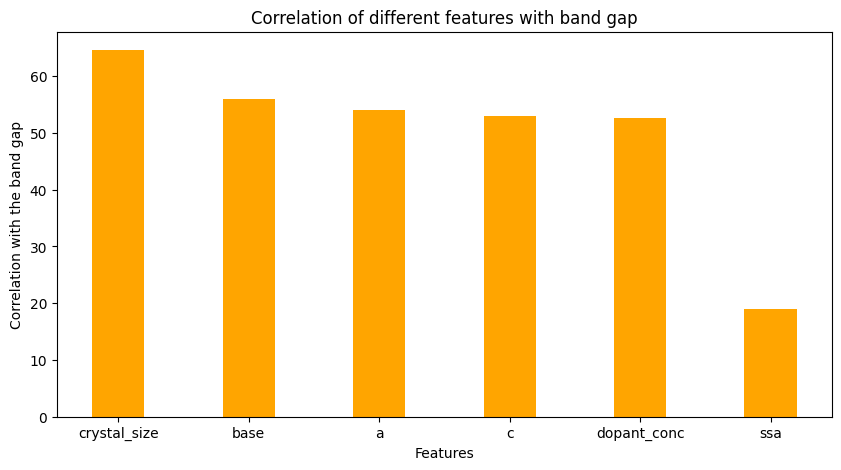

In [73]:
fig = plt.figure(figsize = (10, 5))

param = ['crystal_size', 'base', 'a', 'c', 'dopant_conc', 'ssa']
correlation = [64.6, 55.9, 54.02, 53, 52.66, 18.89]
plt.bar(param, correlation, color ='orange', width = 0.4)

plt.xlabel("Features")
plt.ylabel("Correlation with the band gap")
plt.title("Correlation of different features with band gap")
plt.show()

In [75]:
X = df.drop(['band_gap'], axis=1)
y = df['band_gap']

In [76]:
# Dividing data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
from sklearn.tree import DecisionTreeRegressor 

# Initialise the model
dt_model = DecisionTreeRegressor(random_state = 0)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
dt_y_pred = dt_model.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = dt_model.score(X_test, y_test)

print(f"Mean Squared Error: {dt_mse:.4f}")
print(f"R-squared (R2) Score: {dt_r2:.4f}")

Mean Squared Error: 0.0132
R-squared (R2) Score: 0.8089


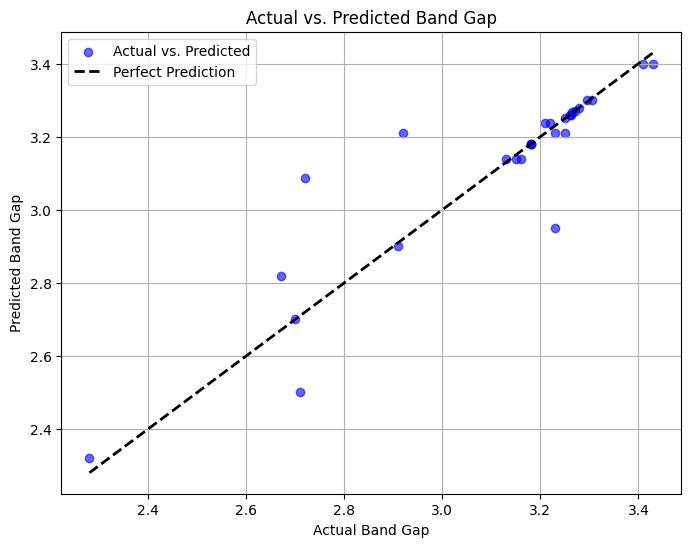

In [80]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_y_pred, color='b', alpha=0.6, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Band Gap')
plt.ylabel('Predicted Band Gap')
plt.title('Actual vs. Predicted Band Gap')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
import xgboost as xgb

# Initialise the model
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)
params = {"objective": "reg:squarederror", "tree_method": "hist"}
n = 100

# Train the model on the training data
xg_model = xgb.train(params=params, dtrain=dtrain_reg, num_boost_round=n)

# Make predictions on the test data
xg_y_pred = xg_model.predict(dtest_reg)

# Evaluate the model
xg_mse = mean_squared_error(y_test, xg_y_pred)
xg_r2 = r2_score(y_test, xg_y_pred)

print(f"Mean Squared Error: {xg_mse:.4f}")
print(f"R-squared (R2) Score: {xg_r2:.4f}")

Mean Squared Error: 0.0185
R-squared (R2) Score: 0.7322


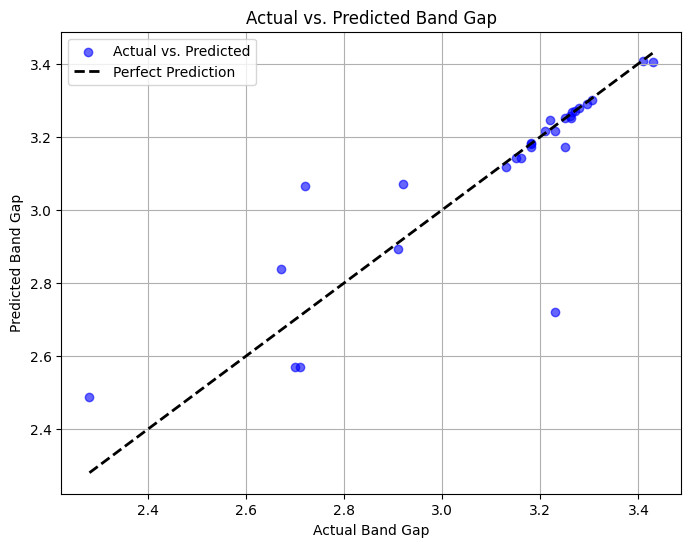

In [82]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, xg_y_pred, color='b', alpha=0.6, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Band Gap')
plt.ylabel('Predicted Band Gap')
plt.title('Actual vs. Predicted Band Gap')
plt.legend()
plt.grid(True)
plt.show()

In [83]:
from sklearn.ensemble import RandomForestRegressor

# Initialise the model
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = rf_model.score(X_test, y_test)

print(f"Mean Squared Error: {rf_mse:.4f}")
print(f"R-squared (R2) Score: {rf_r2:.4f}")

Mean Squared Error: 0.0100
R-squared (R2) Score: 0.8554


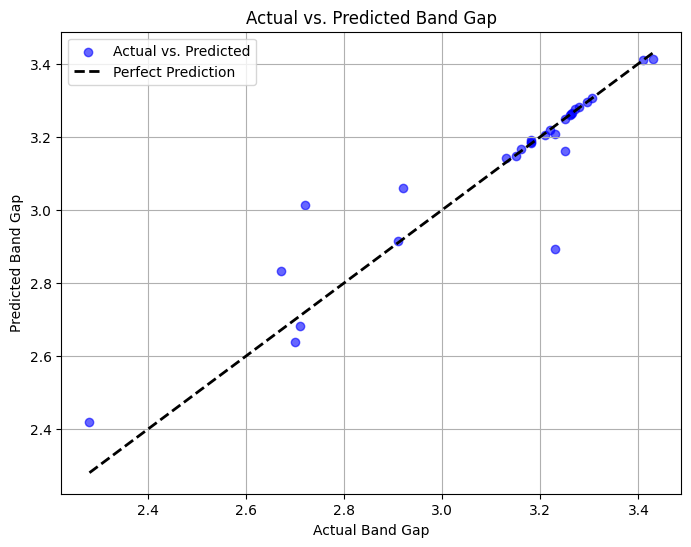

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_y_pred, color='b', alpha=0.6, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Band Gap')
plt.ylabel('Predicted Band Gap')
plt.title('Actual vs. Predicted Band Gap')
plt.legend()
plt.grid(True)
plt.show()

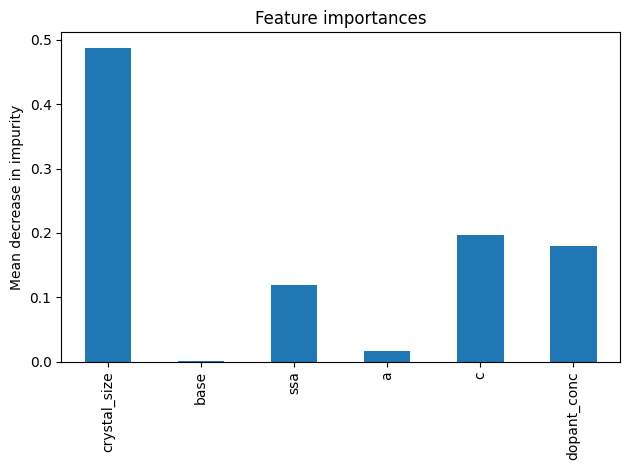

In [86]:
feature_names = X.columns
importances = rf_model.feature_importances_
feature_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
feature_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()